In [152]:
#read the data for student_1
import pandas
file_to_open="student_1.tsv" # file to be opened
data = pandas.read_csv(file_to_open, sep="\t")#open the file with tab as a seperator
R = np.asfarray(data["R"][1:]) # drop ohms label
Vled = np.asfarray(data["Vled"][1:])#drop v label
Vres = np.asfarray(data["Vres"][1:])#drop v label
I = np.asfarray(data["I"][1:])#drop mA label

#and do the same for student_2
file_to_open2="student_2.tsv"#file to be opened
data2 = pandas.read_csv(file_to_open2, sep="\t") #open the file with tab as a seperator
R2 = np.asfarray(data2["R"][1:]) # drop ohms label
Vled2 = np.asfarray(data2["Vled"][1:]) #drop V label
Vres2 = np.asfarray(data2["Vres"][1:]) #drop v label
I2 = np.asfarray(data2["I"][1:]) #drop mA label

In [153]:
sortData=data.sort_values("R") #sort the read data and sort it
print(sortData) #display the data
sortData2=data2.sort_values("R") #sort the read data and sort it
print(sortData2) #display the data

     R  Vled  Vres     I
4  220  2.21  2.82  12.9
6  390     2  2.98  7.79
7  420  1.89  2.85  7.05
5  550  2.04     3   5.5
1  620  2.03  3.05   4.9
3  810  1.99   3.1   3.8
2  820     2  3.09   3.4
0  Ohm     V     V    mA
     R  Vled  Vres     I
1  160  2.97  2.01  12.3
7  270  2.87  2.12   7.9
6  430  2.79  2.21   5.1
5  510  2.77  2.23   4.4
2  620  2.74  2.27   3.7
3  820   2.7   2.3   2.8
4  910  2.69  2.31   2.6
0  Ohm     V     V    mA


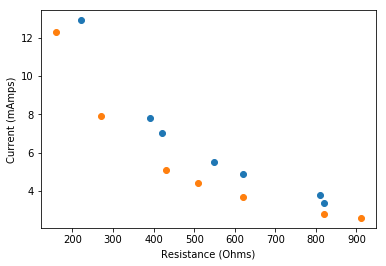

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("Resistance (Ohms)")
plt.ylabel("Current (mAmps)") #set up the graph
IR = sorted(zip(I, R)) #sort the data
Rs = [x for _,x in IR] #get the resistances from the sort list
Is = [y for y,_ in IR] #get the currents from the sorted list
plt.plot(Rs,Is, "o")

#repeat for student_2
IR2 = sorted(zip(I2, R2)) #sort the data
Rs2 = [x for _,x in IR2] #get the resistances from the sort list
Is2 = [y for y,_ in IR2] #get the currents from the sorted list
plt.plot(Rs2,Is2, "o")

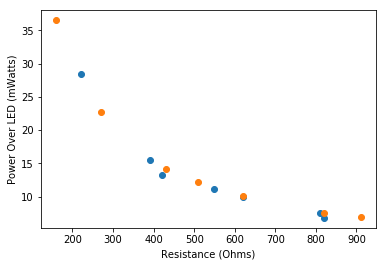

In [214]:
plt.xlabel("Resistance (Ohms)")
plt.ylabel("Power Over LED (mWatts)")
P=I*Vled #calculate the power
RP = sorted(zip(R, P)) #put the data together and sort
Ps = [x for _,x in RP] #get the sorted powers
Rs = [y for y,_ in RP] #get the sorted resistances
plt.plot(Rs, Ps, "o") #plot the data

#repeat for student_2
P2=I2*Vled2 #calculate the power
RP2 = sorted(zip(R2, P2)) #put the data together and sort
Ps2 = [x for _,x in RP2] #get the sorted powers
Rs2 = [y for y,_ in RP2] #get the sorted resistances
plt.plot(Rs2, Ps2, "o") #plot the data

In [218]:
def bestFit(func, xList, yList):
    x0 = [0.0, 0.0]
    import scipy.optimize as optimization
    sigma = [0]*len(xList)
    return optimization.curve_fit(func, xList, yList, x0)

In [255]:
def func1(x, a, b):
    return a + b*x
def getPlotLists(mb, x0, xx, xStep):
    xList = np.array(range(x0, xx, xStep))
    print(xList)
    yList = [0] * len(xList)
    print(yList)
    for x in range (0, len(xList)):
        yList[x] = mb[0] + x * mb[1]
    return [xList, yList]

In [256]:
    rRs = [0] * len(Rs)
    for x in range(0, len(Rs)):
        rRs[x] = 1/Rs[x]
        
#lets test out best fit for the power/resistance graph above
mxb = bestFit(func1, Rs, Ps)
print(mxb[0])

[29.63040336 -0.02988781]


[  0  25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425
 450 475 500 525 550 575 600 625 650 675 700 725 750 775 800 825 850 875
 900 925 950 975]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[array([[29.63040336, -0.02988781],
       [29.63040336, -0.02988781]]), array([[ 4.39524000e+01, -5.28168967e-02],
       [ 2.96074743e+01, -2.98459060e-02]]), array([[ 5.82743967e+01, -7.57459804e-02],
       [ 2.95845452e+01, -2.98039990e-02]]), array([[ 7.25963934e+01, -9.86750642e-02],
       [ 2.95616161e+01, -2.97620921e-02]]), array([[ 8.69183901e+01, -1.21604148e-01],
       [ 2.95386870e+01, -2.97201852e-02]]), array([[ 1.01240387e+02, -1.44533232e-01],
       [ 2.95157579e+01, -2.96782782e-02]]), array([[ 1.15562383e+02, -1.67462315e-01],
       [ 2.94928289e+01, -2.96363713e-02]]), array([[ 1.29884380e+02, -1.90391399e-01],
       [ 2.94698998e+01, -2.95944643e-02]]), array([[ 1.44206377e+02, -

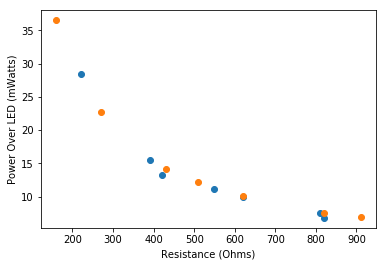

In [257]:
plt.xlabel("Resistance (Ohms)")
plt.ylabel("Power Over LED (mWatts)")

plt.plot(Rs, Ps, "o") #plot the data
plt.plot(Rs2, Ps2, "o") #plot the data

bestFitX, bestFitY = getPlotLists(mxb, 0, 1000, 25)
print(bestFitY)
#plt.plot(bestFitX, bestFitY)

I thought this would be a good time to try to use sciPy. Best fit line solvers are easier to debug than differential equation solvers if you ask me. I think I'm really close but I'm not quite there.